In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 13 kB/s 


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import os
from tensorflow.keras import Sequential
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
print(tf.__version__)

2.6.0


In [6]:
url_train = '/gdrive/My Drive/Computer_Vision/US_Handsign/datatrain' 
urlPath = '/gdrive/My Drive/Computer_Vision/US_Handsign/'

In [7]:
im_size = (256, 256)
im_size2 = (256, 256, 3)

In [8]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    zoom_range = 0.25
)

# Gvfet data from folder
data_train = datagen.flow_from_directory(url_train,
                                         target_size = im_size,
                                         batch_size = 100,
                                         class_mode = 'categorical'
                                         )



Found 2515 images belonging to 36 classes.


In [9]:
data_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [10]:
model = Sequential([
        Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = im_size2),
        MaxPool2D(),                                            
        Conv2D(64, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),                                            
        Conv2D(128, 5, padding = 'same', activation = 'relu'),
        MaxPool2D(),
        Conv2D(256, 5, padding = 'same', activation = 'relu'),
        MaxPool2D(),
        Conv2D(512, 5, padding = 'same', activation = 'relu'),
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(data_train.num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       8

In [12]:
checkpoint_path = urlPath+"/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [13]:
history = model.fit(data_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
26/26 [==============================] - 1199s 44s/step - loss: 3.5858 - accuracy: 0.0211

Epoch 00001: saving model to /gdrive/My Drive/Computer_Vision/US_Handsign//checkpoints/cp.ckpt
Epoch 2/100
26/26 [==============================] - 48s 2s/step - loss: 3.5802 - accuracy: 0.0338

Epoch 00002: saving model to /gdrive/My Drive/Computer_Vision/US_Handsign//checkpoints/cp.ckpt
Epoch 3/100
26/26 [==============================] - 49s 2s/step - loss: 3.5240 - accuracy: 0.0457

Epoch 00003: saving model to /gdrive/My Drive/Computer_Vision/US_Handsign//checkpoints/cp.ckpt
Epoch 4/100
26/26 [==============================] - 50s 2s/step - loss: 3.2376 - accuracy: 0.0640

Epoch 00004: saving model to /gdrive/My Drive/Computer_Vision/US_Handsign//checkpoints/cp.ckpt
Epoch 5/100
26/26 [==============================] - 49s 2s/step - loss: 2.9703 - accuracy: 0.1153

Epoch 00005: saving model to /gdrive/My Drive/Computer_Vision/US_Handsign//checkpoints/cp.ckpt
Epoch 6/100
26/26 [===

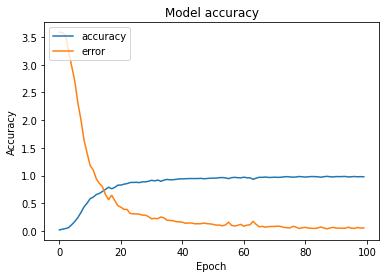

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'error'], loc='upper left')
plt.show()

In [15]:
model.save(urlPath+'model_1.h5')

In [28]:
from tensorflow.keras.models import load_model

model = load_model(urlPath+'model_1.h5')

In [29]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

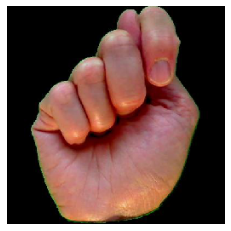

In [38]:
img = load_img(urlPath+"/datatrain/t/hand1_t_bot_seg_4_cropped.jpeg", target_size = im_size)
plt.imshow(img)
plt.axis('off')
plt.show()

In [39]:
img = np.array(img, dtype='float')
img = img.reshape(1, 256, 256, 3)
prediksi = model.predict(img)
idx = np.argmax(prediksi)
print(idx)

29


In [40]:
labels = [v for v in data_train.class_indices.keys()]
print("=======>", labels[idx])

=======> t
